In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import os 

from utils import OUT_PATH

files_new = [f for f in os.listdir(OUT_PATH + '/recogdef') if 'new' in f]
files = os.listdir(OUT_PATH + '/recogdef')


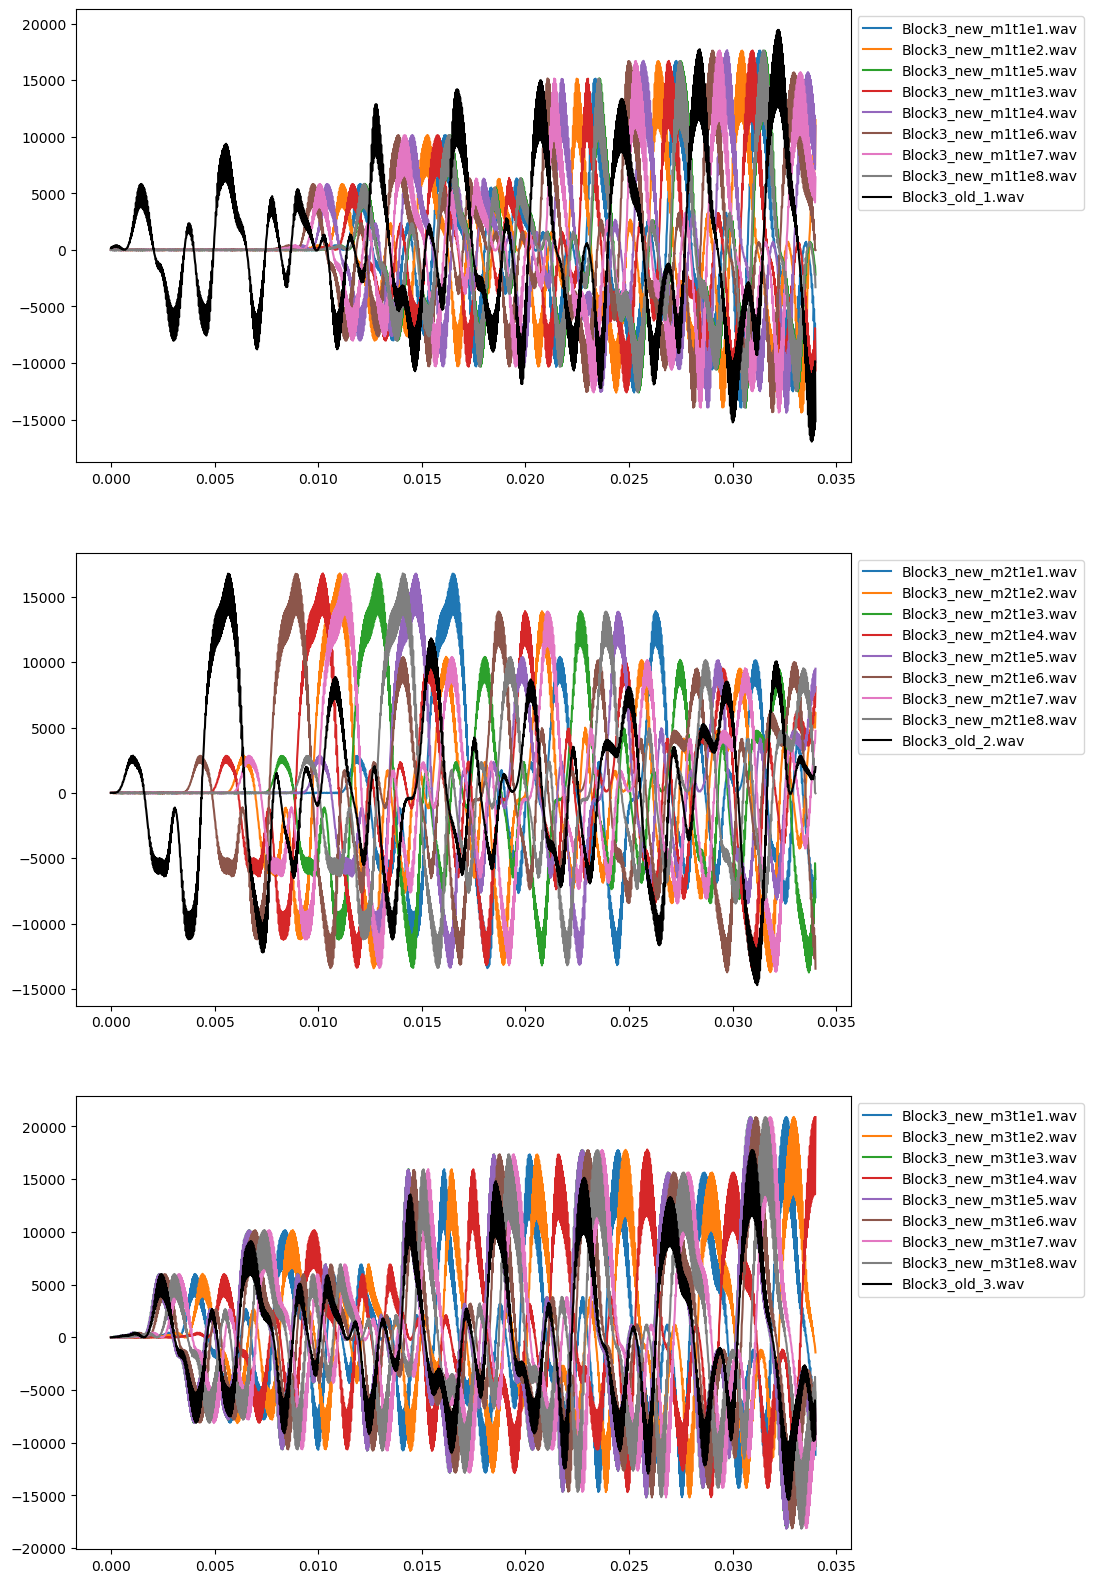

In [2]:
fig, ax = plt.subplots(3, 1, figsize=(10, 20))
audios = []
for f in files :
    for i in range(3):
        if f'old_{str(i+1)}' in f or f'm{str(i+1)}' in f : 
            w = wave.open(OUT_PATH + '/recogdef/' + f, 'r')
            n_frames = w.getnframes()
            frames = w.readframes(n_frames, )
            frame_rate = w.getframerate()

            t = np.linspace(0, n_frames / frame_rate, num=n_frames)


            audio = np.frombuffer(frames, dtype=np.int16 )
            if f'old_{str(i+1)}' in f :
                ax[i].plot(t[:1500], audio[:1500], '-', color='black', label=f)
            else :
                ax[i].plot(t[:1500], audio[:1500], '-', label=f)
            
            ax[i].legend(bbox_to_anchor = (1, 1))
            audios.append(audio)
            


In [3]:
from scipy.signal import find_peaks, savgol_filter


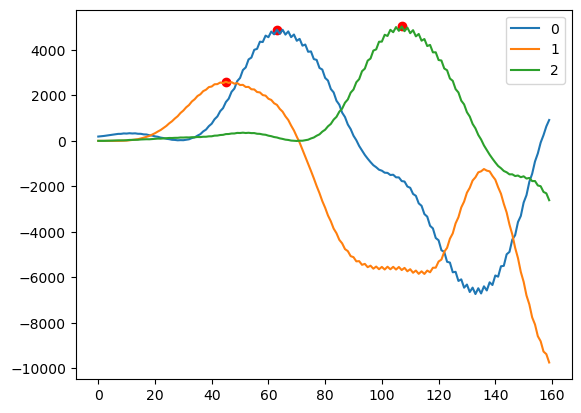

In [4]:
# get the ref 
ref_point = np.zeros(3)
ref_ampli = {}
for i in range(3): 
    w = wave.open(OUT_PATH + f'/recogdef/Block3_old_{i+1}.wav', 'r')
    n_frames = w.getnframes()
    frames = w.readframes(n_frames, )
    frame_rate = w.getframerate()
    t = np.linspace(0, n_frames / frame_rate, num=n_frames)
    a = np.frombuffer(frames, dtype=np.int16 )

    a_smooth = savgol_filter(a, window_length=15, polyorder=3)
    peaks = np.argmax(a_smooth[:160])

    ref_point[i] = peaks
    ref_ampli[i] = a_smooth[peaks]
    plt.plot(a_smooth[:160], label = i)
    plt.scatter(peaks, a_smooth[peaks], c='red')
plt.legend()


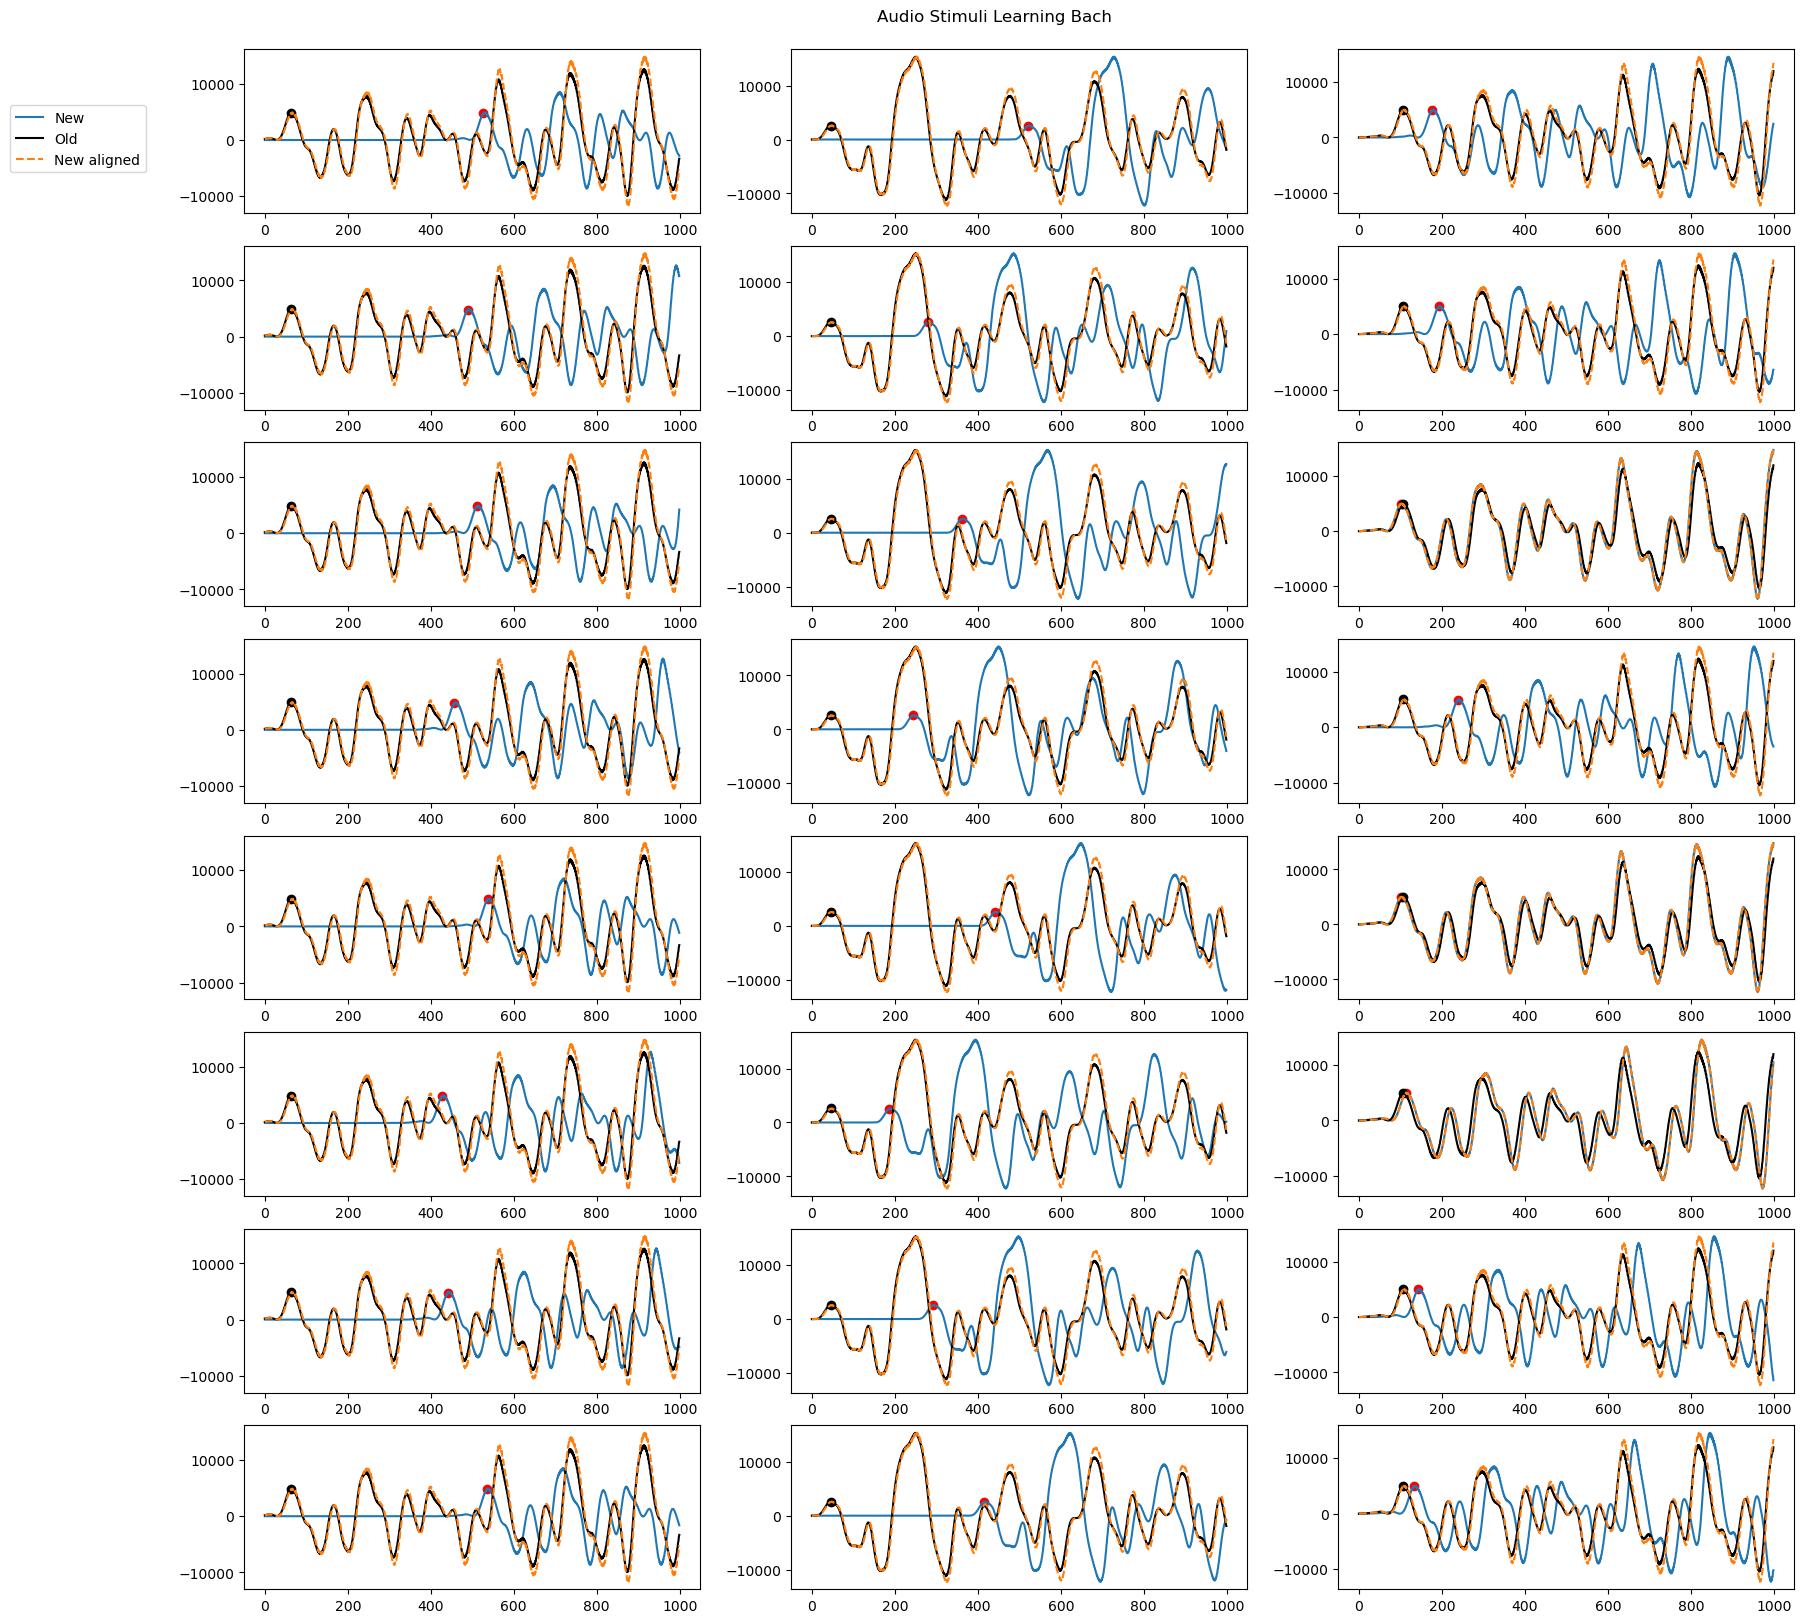

In [5]:
fig, axs = plt.subplots(8, 3, figsize=(20, 20))
delay = np.zeros([8, 3])
fig.suptitle('Audio Stimuli Learning Bach', y=0.9)
for j in range(8) :
    for i in range(3) :
        f = OUT_PATH + f'/recogdef/Block3_new_m{str(i+1)}t1e{str(j+1)}.wav'
        w = wave.open(f, 'r')
        n_frames = w.getnframes()
        frames = w.readframes(n_frames, )
        frame_rate = w.getframerate()
        t = np.linspace(0, n_frames / frame_rate, num=n_frames)
        a = np.frombuffer(frames, dtype=np.int16 )
        a_smooth = savgol_filter(a, window_length=15, polyorder=3)
        peaks, _ =find_peaks(a_smooth, height = ref_ampli[i]-100)
        #peaks = np.argmax(a_smooth[:400])
        axs[j][i].plot(a_smooth[:1000], label ='New')
        axs[j][i].scatter(peaks[0], a_smooth[peaks[0]], c='red')
        delay[j][i] = ref_point[i] - peaks[0]

        if abs(delay[j][i]) < 10 :
            delay[j][i] = 0
        
        # plot ref 
        w = wave.open(OUT_PATH + f'/recogdef/Block3_old_{i+1}.wav', 'r')
        n_frames = w.getnframes()
        frames = w.readframes(n_frames, )
        frame_rate = w.getframerate()
        t = np.linspace(0, n_frames / frame_rate, num=n_frames)
        a = np.frombuffer(frames, dtype=np.int16 )

        a_smooth_ref = savgol_filter(a, window_length=15, polyorder=3)
        axs[j][i].plot(a_smooth_ref[:1000], c='black', label='Old')
        peaks = np.argmax(a_smooth_ref[:160])
        axs[j][i].scatter(peaks, a_smooth_ref[peaks], c='black')

        axs[j][i].plot(a_smooth[int(abs(delay[j][i])):1000 + int(abs(delay[j][i]))], '--', label = 'New aligned')

axs[0][0].legend(bbox_to_anchor = (-0.2, 0.7))




In [6]:
import pandas as pd

dalay_df = pd.DataFrame(delay)
dalay_df.to_csv(OUT_PATH + '/recogdef/delay.csv')